In [1]:
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Heart_DF.csv')

In [3]:
#Data Exploration

In [4]:
df['Major_Vessels'] = df['Major_Vessels'].replace(to_replace='?', value='4')
df['Thalessemia'] = df['Thalessemia'].replace(to_replace='?', value='1')
data_types_dict = {'Major_Vessels': int, 'Thalessemia': int}
  
# we will change the data type 
# of id column to str by giving
# the dict to the astype method
df = df.astype(data_types_dict)

In [5]:
df.groupby(df['Thalessemia']).count()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Target
Thalessemia,,,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,166,166,166,166,166,166,166,166,166,166,166,166,166,166
6,18,18,18,18,18,18,18,18,18,18,18,18,18,18
7,117,117,117,117,117,117,117,117,117,117,117,117,117,117


In [6]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Colestrol', 'Fasting_Blood_Sugar', 'Rest_ECG', 'MAX_Heart_Rate',
       'Exercised_Induced_Angina', 'ST_Depression', 'Slope', 'Major_Vessels',
       'Thalessemia', 'Target'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                303 non-null    int64  
 1   Age                       303 non-null    int64  
 2   Sex                       303 non-null    int64  
 3   Chest_Pain                303 non-null    int64  
 4   Resting_Blood_Pressure    303 non-null    int64  
 5   Colestrol                 303 non-null    int64  
 6   Fasting_Blood_Sugar       303 non-null    int64  
 7   Rest_ECG                  303 non-null    int64  
 8   MAX_Heart_Rate            303 non-null    int64  
 9   Exercised_Induced_Angina  303 non-null    int64  
 10  ST_Depression             303 non-null    float64
 11  Slope                     303 non-null    int64  
 12  Major_Vessels             303 non-null    int32  
 13  Thalessemia               303 non-null    int32  
 14  Target    

In [8]:
df['Target'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [9]:
df.columns
df[df['Target']==0]

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
7,7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0
291,291,55,0,2,132,342,0,0,166,0,1.2,1,0,3,0
295,295,41,1,2,120,157,0,0,182,0,0.0,1,0,3,0


In [10]:
df.describe()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.716172,4.709571,0.937294
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.005927,1.956854,1.228536
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,75.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,151.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,226.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,302.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000


In [11]:
#sns.pairplot(df.drop(['Target','Exercised_Induced_Angina','Slope'],axis=1))

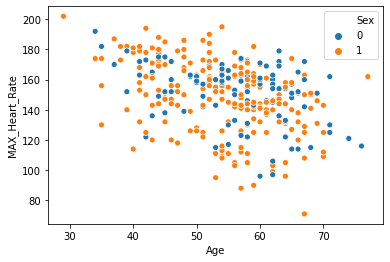

In [12]:
sns.scatterplot(x=df['Age'],y=df['MAX_Heart_Rate'], hue=df['Sex'])

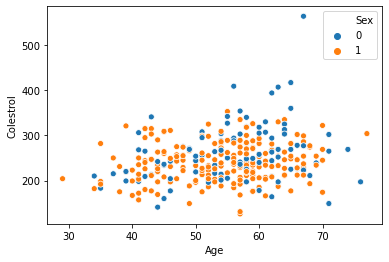

In [13]:
sns.scatterplot(x=df['Age'],y=df['Colestrol'], hue=df['Sex'])

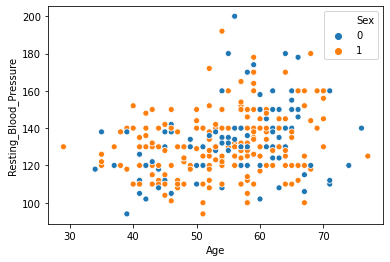

In [14]:
sns.scatterplot(x=df['Age'],y=df['Resting_Blood_Pressure'], hue=df['Sex'])

In [15]:
#It looks like a categorization problem 0 to 4

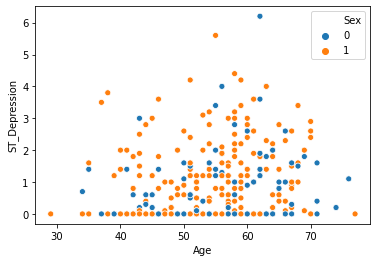

In [16]:
sns.scatterplot(x=df['Age'],y=df['ST_Depression'], hue=df['Sex'])

In [17]:
#Discoveries : Sex doesnt seem to have relationship with any of the other variables. The two
# groups seem homgenous
# TO DO: 
# - Find relationship between 2 medical parameters with sex and age as hue
# - categorize age in subgroups to have better data viz
# - PCA to do

In [18]:
# to create age cat
bins = [0, 25, 50, 75,100]
df['AgeCat']= pd.cut(df['Age'], bins)
df

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target,AgeCat
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,"(50, 75]"
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,"(50, 75]"
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,"(50, 75]"
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,"(25, 50]"
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,"(25, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,"(25, 50]"
299,299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,"(50, 75]"
300,300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,"(50, 75]"
301,301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,"(50, 75]"


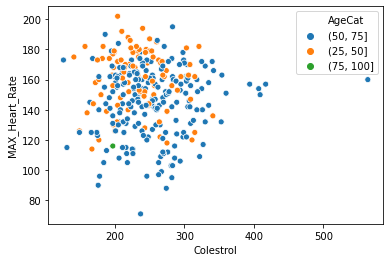

In [19]:
sns.scatterplot(x=df['Colestrol'],y=df['MAX_Heart_Rate'], hue=df['AgeCat'])

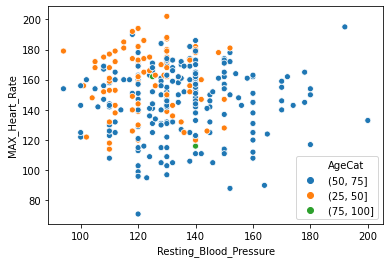

In [20]:
sns.scatterplot(x=df['Resting_Blood_Pressure'],y=df['MAX_Heart_Rate'], hue=df['AgeCat'])

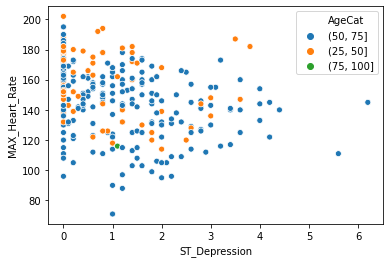

In [21]:
sns.scatterplot(x=df['ST_Depression'],y=df['MAX_Heart_Rate'], hue=df['AgeCat'])

In [22]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [23]:
df.drop('Unnamed: 0',axis=1)

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target,AgeCat
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,"(50, 75]"
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,"(50, 75]"
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,"(50, 75]"
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,"(25, 50]"
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,"(25, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,"(25, 50]"
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,"(50, 75]"
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,"(50, 75]"
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,"(50, 75]"


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                303 non-null    int64   
 1   Age                       303 non-null    int64   
 2   Sex                       303 non-null    int64   
 3   Chest_Pain                303 non-null    int64   
 4   Resting_Blood_Pressure    303 non-null    int64   
 5   Colestrol                 303 non-null    int64   
 6   Fasting_Blood_Sugar       303 non-null    int64   
 7   Rest_ECG                  303 non-null    int64   
 8   MAX_Heart_Rate            303 non-null    int64   
 9   Exercised_Induced_Angina  303 non-null    int64   
 10  ST_Depression             303 non-null    float64 
 11  Slope                     303 non-null    int64   
 12  Major_Vessels             303 non-null    int32   
 13  Thalessemia               303 non-null    int32   

In [25]:
value=['?']
df = df[df['Thalessemia'].isin(value)==False]#'Thalessemia']]
df = df[df['Major_Vessels'].isin(value)==False]
df

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target,AgeCat
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,"(50, 75]"
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,"(50, 75]"
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,"(50, 75]"
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,"(25, 50]"
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,"(25, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,"(25, 50]"
299,299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,"(50, 75]"
300,300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,"(50, 75]"
301,301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,"(50, 75]"


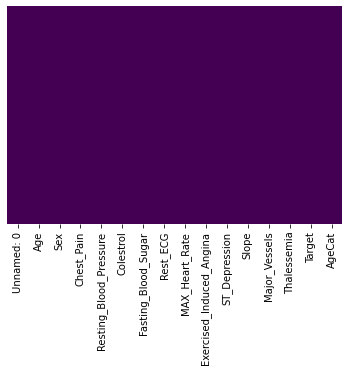

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [28]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Colestrol', 'Fasting_Blood_Sugar', 'Rest_ECG', 'MAX_Heart_Rate',
       'Exercised_Induced_Angina', 'ST_Depression', 'Slope', 'Major_Vessels',
       'Thalessemia', 'Target', 'AgeCat'],
      dtype='object')

In [29]:
X = df.drop(['Target','AgeCat','Unnamed: 0'],axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df['Target'])

In [30]:
y_test[y_test == 4]
#y_train[y_train==4]

285    4
24     4
47     4
153    4
Name: Target, dtype: int64

In [31]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=200)

In [32]:
rfc_pred=rfc.predict(X_test)

In [33]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[46  2  1  0  0]
 [10  1  2  4  0]
 [ 1  6  2  2  0]
 [ 1  2  4  1  2]
 [ 0  1  1  2  0]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        49
           1       0.08      0.06      0.07        17
           2       0.20      0.18      0.19        11
           3       0.11      0.10      0.11        10
           4       0.00      0.00      0.00         4

    accuracy                           0.55        91
   macro avg       0.24      0.26      0.24        91
weighted avg       0.48      0.55      0.51        91



In [34]:
df.groupby('Target').count()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,AgeCat
Target,,,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164
1,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
2,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
3,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [35]:
#TODO 
# - Test new models
# - Do a PCA test

In [36]:
#PCA Test
#1-Scale Data
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
scaler.fit(df.drop('AgeCat',axis=1))

StandardScaler()

In [38]:
scaled_data = scaler.transform(df.drop('AgeCat',axis=1))

In [39]:
#2 - principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [40]:
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

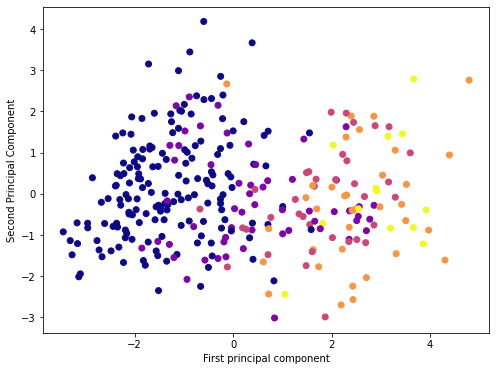

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [42]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns.drop('AgeCat'))

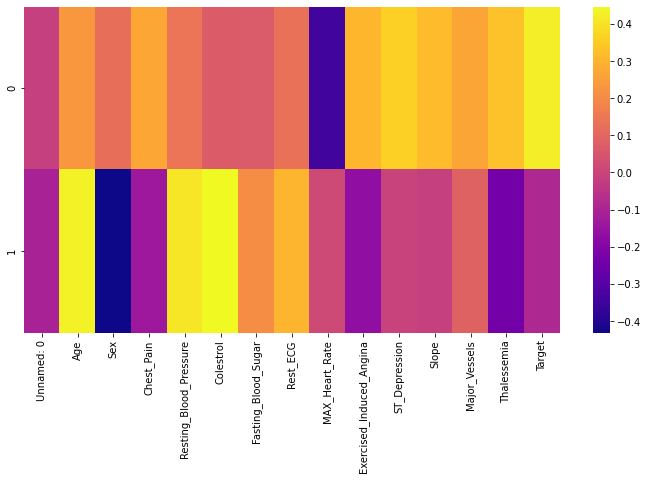

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [44]:
#Not very interesting, we see people in the category 0 and 1 are clustered together
# vs 2 to 4 in a very homogenous way. Given that I want to predict the distinct category

In [45]:
#Changing cat 1,2,3,4 into 1
df.loc[df['Target'] == 2, 'Target'] = 1
df.loc[df['Target'] == 3, 'Target'] = 1
df.loc[df['Target'] == 4, 'Target'] = 1

In [46]:
# As we can see above. Our dataset is unbalanced. Most of the records are labeled with a 0
# target (160 are 0 on a ~300 dataset)

#Let's use SMOTE technic to simulate X data

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_res, y_res=sm.fit_resample(X_train,y_train)

In [47]:
rfcSim= RandomForestClassifier(n_estimators = 200)
rfcSim.fit(X_res, y_res)

RandomForestClassifier(n_estimators=200)

In [48]:
X_res

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia
0,59,1,1,160,273,0,2,125,0,0.000000,1,0,3
1,48,1,3,124,255,1,0,175,0,0.000000,1,2,3
2,59,1,4,110,239,0,2,142,1,1.200000,2,1,7
3,69,0,1,140,239,0,0,151,0,1.800000,1,2,3
4,57,1,3,150,126,1,0,173,0,0.200000,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,63,0,4,150,373,0,2,146,0,3.447727,2,3,7
571,44,0,1,126,229,0,0,166,0,3.173441,2,0,7
572,38,1,1,120,230,0,0,181,0,3.797860,2,0,6
573,43,1,1,125,226,0,0,170,0,3.391793,2,0,6


In [49]:
rfcSim_pred=rfcSim.predict(X_test)

In [50]:
print(confusion_matrix(y_test,rfcSim_pred))
print(classification_report(y_test,rfcSim_pred))

[[35 11  2  0  1]
 [ 7  2  4  4  0]
 [ 0  3  3  5  0]
 [ 0  2  4  1  3]
 [ 0  1  1  2  0]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        49
           1       0.11      0.12      0.11        17
           2       0.21      0.27      0.24        11
           3       0.08      0.10      0.09        10
           4       0.00      0.00      0.00         4

    accuracy                           0.45        91
   macro avg       0.25      0.24      0.24        91
weighted avg       0.50      0.45      0.47        91



In [51]:
# Testing out Logistic regression
from sklearn.linear_model import LogisticRegression
logmod=LogisticRegression()
logmod.fit(X_res,y_res)

C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
logmod_pred=logmod.predict(X_test)

In [53]:
print(confusion_matrix(y_test,logmod_pred))
print(classification_report(y_test,logmod_pred))

[[32 12  1  0  4]
 [ 4  5  2  5  1]
 [ 0  3  2  2  4]
 [ 0  0  5  2  3]
 [ 0  0  1  2  1]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.75        49
           1       0.25      0.29      0.27        17
           2       0.18      0.18      0.18        11
           3       0.18      0.20      0.19        10
           4       0.08      0.25      0.12         4

    accuracy                           0.46        91
   macro avg       0.32      0.32      0.30        91
weighted avg       0.57      0.46      0.50        91



In [54]:
#To Scale data we are going to exploit
scal = StandardScaler()
scal.fit(df.drop(['AgeCat','Target','Unnamed: 0', 'Age', 'Sex'],axis=1))

StandardScaler()

In [55]:
scal_features = scal.transform(df.drop(['AgeCat','Target','Unnamed: 0', 'Age', 'Sex'],axis=1))

In [56]:
df_feat = pd.DataFrame(scal_features,columns=df.drop(['AgeCat','Target','Unnamed: 0', 'Age', 'Sex'],axis=1).columns)

In [57]:
df_feat

,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia
0,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.713129,0.660531
1,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.274127,-0.875077
2,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.278375,1.172401
3,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.713129,-0.875077
4,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.713129,-0.875077
...,...,...,...,...,...,...,...,...,...,...,...
298,-2.251775,-1.234430,0.334813,-0.417635,-0.996749,-0.770990,-0.696631,0.138373,0.649113,-0.713129,1.172401
299,0.877985,0.700612,-1.038723,2.394438,-0.996749,-0.376896,-0.696631,2.036303,0.649113,1.278375,1.172401
300,0.877985,-0.096170,-2.238149,-0.417635,-0.996749,-1.515388,1.435481,0.138373,0.649113,0.282623,1.172401
301,-1.208521,-0.096170,-0.206864,-0.417635,1.016684,1.068113,-0.696631,-0.896862,0.649113,0.282623,-0.875077


In [58]:
X=df_feat.columns
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(scal_features,df['Target'],
                                                    test_size=0.30)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [60]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [61]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[30 14]
 [13 34]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        44
           1       0.71      0.72      0.72        47

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91



In [62]:
error_rate = []

for i in range(1,200): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(abs(pred_i-y_test)))
mini = error_rate[0]
for i in range(0,len(error_rate)): 
    if (error_rate[i] < mini):
        mini = error_rate[i]
        tokeep = i

Text(0, 0.5, 'Error Rate')

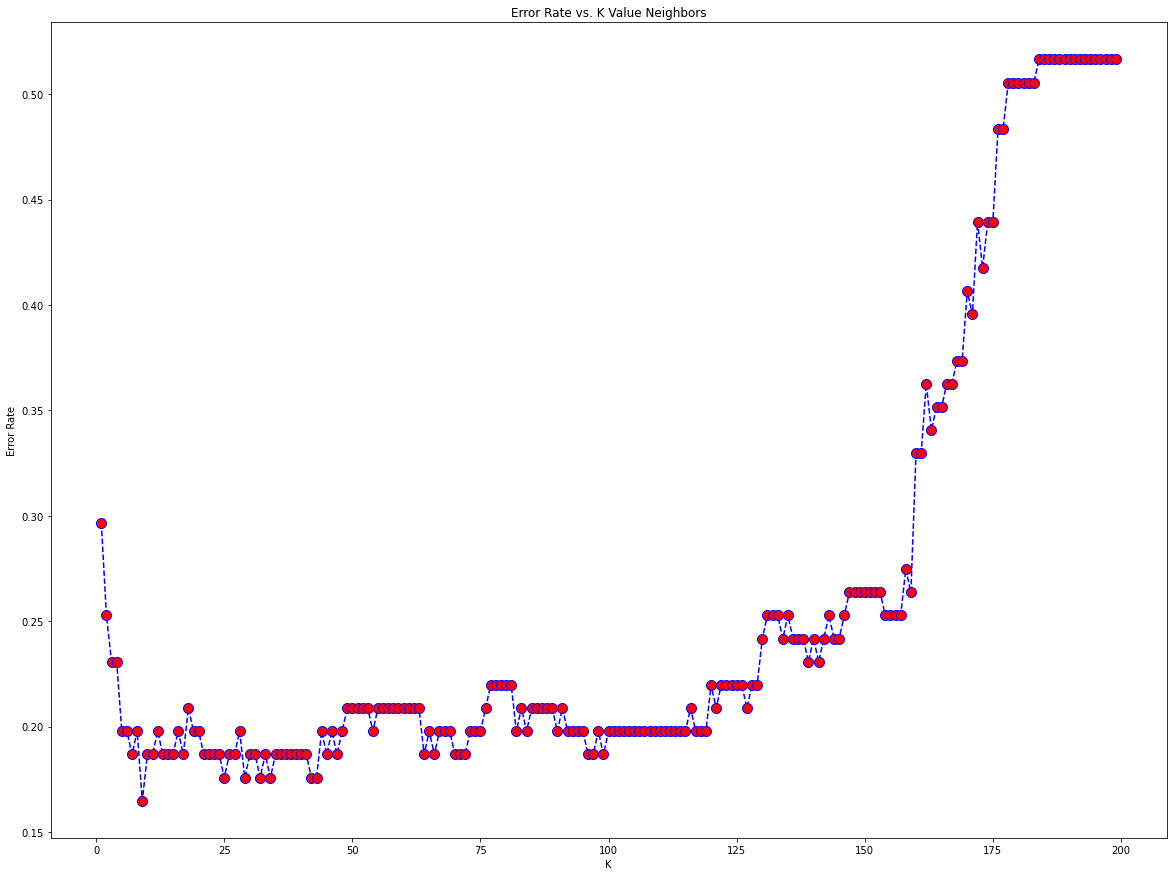

In [63]:
plt.figure(figsize=(20,15))
plt.plot(range(1,200),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value Neighbors')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [64]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
knn.fit(X_test,y_test)

KNeighborsClassifier(n_neighbors=1)

In [65]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[30 14]
 [13 34]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        44
           1       0.71      0.72      0.72        47

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91



In [66]:
#TODO
#Create new columns using getdummies and test all 3 models (See ANN example)
#Review SMOTE

In [67]:
#df.insert(2,'ST_DepressionRound',df['ST_Depression'].round())

In [68]:
#Create dummy columns to feed the model
#Create dummies with Chest_Pain, Fasting_Blood_Sugar, Rest_ECG,
#Exercised_Induced_Angina, Slope, Major_Vessels, Thalessemia
to_convert = df[['Resting_Blood_Pressure','Colestrol','MAX_Heart_Rate','Age']]
to_convert

,Resting_Blood_Pressure,Colestrol,MAX_Heart_Rate,Age
0,145,233,150,63
1,160,286,108,67
2,120,229,129,67
3,130,250,187,37
4,130,204,172,41
...,...,...,...,...
298,110,264,132,45
299,144,193,141,68
300,130,131,115,57
301,130,236,174,57


In [69]:
# Create new columns with quantiles (will be used as dummies)
#def quantileCreate():
for name, values in to_convert.iteritems():
    df.insert(2, name+'_Quart', pd.qcut(df[name], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']))

In [70]:
df

,Unnamed: 0,Age,Age_Quart,MAX_Heart_Rate_Quart,Colestrol_Quart,Resting_Blood_Pressure_Quart,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target,AgeCat
0,0,63,Q4,Q2,Q2,Q4,1,1,145,233,1,2,150,0,2.3,3,0,6,0,"(50, 75]"
1,1,67,Q4,Q1,Q4,Q4,1,4,160,286,0,2,108,1,1.5,2,3,3,1,"(50, 75]"
2,2,67,Q4,Q1,Q2,Q1,1,4,120,229,0,2,129,1,2.6,2,2,7,1,"(50, 75]"
3,3,37,Q1,Q4,Q3,Q2,1,3,130,250,0,0,187,0,3.5,3,0,3,0,"(25, 50]"
4,4,41,Q1,Q4,Q1,Q2,0,2,130,204,0,2,172,0,1.4,1,0,3,0,"(25, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,45,Q1,Q1,Q3,Q1,1,1,110,264,0,0,132,0,1.2,2,0,7,1,"(25, 50]"
299,299,68,Q4,Q2,Q1,Q4,1,4,144,193,1,0,141,0,3.4,2,2,7,1,"(50, 75]"
300,300,57,Q3,Q1,Q1,Q2,1,4,130,131,0,0,115,1,1.2,2,1,7,1,"(50, 75]"
301,301,57,Q3,Q4,Q2,Q2,0,2,130,236,0,2,174,0,0.0,2,1,3,1,"(50, 75]"


In [71]:
to_convert

,Resting_Blood_Pressure,Colestrol,MAX_Heart_Rate,Age
0,145,233,150,63
1,160,286,108,67
2,120,229,129,67
3,130,250,187,37
4,130,204,172,41
...,...,...,...,...
298,110,264,132,45
299,144,193,141,68
300,130,131,115,57
301,130,236,174,57


In [72]:
df['Colestrol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: Colestrol, dtype: float64

In [73]:
df['Resting_Blood_Pressure'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: Resting_Blood_Pressure, dtype: float64

In [74]:
df['MAX_Heart_Rate'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: MAX_Heart_Rate, dtype: float64

In [75]:
df.groupby('Chest_Pain').count()

,Unnamed: 0,Age,Age_Quart,MAX_Heart_Rate_Quart,Colestrol_Quart,Resting_Blood_Pressure_Quart,Sex,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target,AgeCat
Chest_Pain,,,,,,,,,,,,,,,,,,,
1,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
2,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
3,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86
4,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144


In [76]:
df.columns

Index(['Unnamed: 0', 'Age', 'Age_Quart', 'MAX_Heart_Rate_Quart',
       'Colestrol_Quart', 'Resting_Blood_Pressure_Quart', 'Sex', 'Chest_Pain',
       'Resting_Blood_Pressure', 'Colestrol', 'Fasting_Blood_Sugar',
       'Rest_ECG', 'MAX_Heart_Rate', 'Exercised_Induced_Angina',
       'ST_Depression', 'Slope', 'Major_Vessels', 'Thalessemia', 'Target',
       'AgeCat'],
      dtype='object')

In [77]:
#create dummies and merge all data
sex_dummies = pd.get_dummies(df['Sex'], drop_first=False, prefix='sex', dtype=int)
cp_dummies = pd.get_dummies(df['Chest_Pain'], drop_first=False, prefix='cp', dtype=int)
fbs_dummies = pd.get_dummies(df['Fasting_Blood_Sugar'],drop_first=False, prefix='fbs', dtype=int)
recg_dummies = pd.get_dummies(df['Rest_ECG'],drop_first=False,prefix='recg', dtype=int)
eia_dummies = pd.get_dummies(df['Exercised_Induced_Angina'],drop_first=False,prefix='eia', dtype=int)
s_dummies = pd.get_dummies(df['Slope'],drop_first=False,prefix='s', dtype=int)
mv_dummies = pd.get_dummies(df['Major_Vessels'],drop_first=False,prefix='mv', dtype=int)
th_dummies = pd.get_dummies(df['Thalessemia'],drop_first=False,prefix='th', dtype=int)
print(cp_dummies)
#mhr_dummies = pd.get_dummies(df['MAX_Heart_Rate_Quart'],drop_first=True,prefix='mhr', dtype=int)
#col_dummies = pd.get_dummies(df['Colestrol_Quart'],drop_first=True,prefix='col', dtype=int)
#rbp_dummies = pd.get_dummies(df['Resting_Blood_Pressure_Quart'],drop_first=True,prefix='col', dtype=int)
#a_dummies = pd.get_dummies(df['Age_Quart'],drop_first=True,prefix='a', dtype=int)

#mhr_dummies

# create a new df
df = pd.merge(left=df, right=sex_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=cp_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=fbs_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=recg_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=eia_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=s_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=mv_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=th_dummies, how='left', left_index=True, right_index=True)
#df = pd.merge(left=df, right=mhr_dummies, how='left', left_index=True, right_index=True) 
#df = pd.merge(left=df, right=col_dummies, how='left', left_index=True, right_index=True)
#df = pd.merge(left=df, right=rbp_dummies, how='left', left_index=True, right_index=True)
#df = pd.merge(left=df, right=a_dummies, how='left', left_index=True, right_index=True)

     cp_1  cp_2  cp_3  cp_4
0       1     0     0     0
1       0     0     0     1
2       0     0     0     1
3       0     0     1     0
4       0     1     0     0
..    ...   ...   ...   ...
298     1     0     0     0
299     0     0     0     1
300     0     0     0     1
301     0     1     0     0
302     0     0     1     0

[303 rows x 4 columns]


In [78]:
#Create dummies for age, sex, resting blood pressure, max_heart rate, cholesterol

In [79]:
df

,Unnamed: 0,Age,Age_Quart,MAX_Heart_Rate_Quart,Colestrol_Quart,Resting_Blood_Pressure_Quart,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,...,s_3,mv_0,mv_1,mv_2,mv_3,mv_4,th_1,th_3,th_6,th_7
0,0,63,Q4,Q2,Q2,Q4,1,1,145,233,...,1,1,0,0,0,0,0,0,1,0
1,1,67,Q4,Q1,Q4,Q4,1,4,160,286,...,0,0,0,0,1,0,0,1,0,0
2,2,67,Q4,Q1,Q2,Q1,1,4,120,229,...,0,0,0,1,0,0,0,0,0,1
3,3,37,Q1,Q4,Q3,Q2,1,3,130,250,...,1,1,0,0,0,0,0,1,0,0
4,4,41,Q1,Q4,Q1,Q2,0,2,130,204,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,45,Q1,Q1,Q3,Q1,1,1,110,264,...,0,1,0,0,0,0,0,0,0,1
299,299,68,Q4,Q2,Q1,Q4,1,4,144,193,...,0,0,0,1,0,0,0,0,0,1
300,300,57,Q3,Q1,Q1,Q2,1,4,130,131,...,0,0,1,0,0,0,0,0,0,1
301,301,57,Q3,Q4,Q2,Q2,0,2,130,236,...,0,0,1,0,0,0,0,1,0,0


In [80]:
df.columns

Index(['Unnamed: 0', 'Age', 'Age_Quart', 'MAX_Heart_Rate_Quart',
       'Colestrol_Quart', 'Resting_Blood_Pressure_Quart', 'Sex', 'Chest_Pain',
       'Resting_Blood_Pressure', 'Colestrol', 'Fasting_Blood_Sugar',
       'Rest_ECG', 'MAX_Heart_Rate', 'Exercised_Induced_Angina',
       'ST_Depression', 'Slope', 'Major_Vessels', 'Thalessemia', 'Target',
       'AgeCat', 'sex_0', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0',
       'fbs_1', 'recg_0', 'recg_1', 'recg_2', 'eia_0', 'eia_1', 's_1', 's_2',
       's_3', 'mv_0', 'mv_1', 'mv_2', 'mv_3', 'mv_4', 'th_1', 'th_3', 'th_6',
       'th_7'],
      dtype='object')

In [81]:
#Drop the columns that are the source of the dummy columns
df=df.drop(['Chest_Pain','Fasting_Blood_Sugar','Rest_ECG','Exercised_Induced_Angina','Slope',\
            'Major_Vessels','Thalessemia','AgeCat', 'Unnamed: 0', 'Colestrol_Quart', 'Colestrol',\
           'Resting_Blood_Pressure_Quart','Resting_Blood_Pressure','Age_Quart','MAX_Heart_Rate_Quart',\
            'MAX_Heart_Rate','Sex'],axis=1)
df

,Age,ST_Depression,Target,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,...,s_3,mv_0,mv_1,mv_2,mv_3,mv_4,th_1,th_3,th_6,th_7
0,63,2.3,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1,67,1.5,1,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
2,67,2.6,1,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
3,37,3.5,0,0,1,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,0
4,41,1.4,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1.2,1,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
299,68,3.4,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
300,57,1.2,1,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
301,57,0.0,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [82]:
#Train models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [83]:
#Changing cat 1,2,3,4 into 1
df.loc[df['Target'] == 2, 'Target'] = 1
df.loc[df['Target'] == 3, 'Target'] = 1
df.loc[df['Target'] == 4, 'Target'] = 1

In [84]:
X = df.drop('Target',axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)
rfcModel =  RandomForestClassifier(n_estimators=200, max_depth=5,max_features=4)

In [85]:
rfcModel.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=200)

In [86]:
rfcModel_pred = rfcModel.predict(X_test)

In [87]:
print(confusion_matrix(y_test,rfcModel_pred))
print(classification_report(y_test,rfcModel_pred))

[[38  4]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.87      0.79      0.83        34

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [88]:
#Still bad F1_score. Let's try SMOTE with the dummy params
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_res, y_res=sm.fit_resample(X_train,y_train)

In [89]:
rfcModelSim= RandomForestClassifier(n_estimators = 200, max_depth=5,max_features=4)
rfcModelSim.fit(X_res, y_res)

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=200)

In [90]:
rfcModelSim_pred = rfcModelSim.predict(X_test)

In [91]:
print(confusion_matrix(y_test,rfcModelSim_pred))
print(classification_report(y_test,rfcModelSim_pred))

[[37  5]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.85      0.85      0.85        34

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [92]:
#Still no good, let's try to categorize as 0 for good and 1 as disease

In [93]:
#Changing cat 1,2,3,4 into 1
df.loc[df['Target'] == 2, 'Target'] = 1
df.loc[df['Target'] == 3, 'Target'] = 1
df.loc[df['Target'] == 4, 'Target'] = 1

In [94]:
#More balanced categories
df.groupby('Target').count()

,Age,ST_Depression,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,...,s_3,mv_0,mv_1,mv_2,mv_3,mv_4,th_1,th_3,th_6,th_7
Target,,,,,,,,,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
1,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139


In [95]:
df

,Age,ST_Depression,Target,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,...,s_3,mv_0,mv_1,mv_2,mv_3,mv_4,th_1,th_3,th_6,th_7
0,63,2.3,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1,67,1.5,1,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
2,67,2.6,1,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
3,37,3.5,0,0,1,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,0
4,41,1.4,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1.2,1,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
299,68,3.4,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
300,57,1.2,1,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
301,57,0.0,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [96]:
#Let's retry model
X = df.drop('Target',axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)
rfcModel =  RandomForestClassifier(n_estimators=200, max_depth=5,max_features=4)

In [97]:
X.columns

Index(['Age', 'ST_Depression', 'sex_0', 'sex_1', 'cp_1', 'cp_2', 'cp_3',
       'cp_4', 'fbs_0', 'fbs_1', 'recg_0', 'recg_1', 'recg_2', 'eia_0',
       'eia_1', 's_1', 's_2', 's_3', 'mv_0', 'mv_1', 'mv_2', 'mv_3', 'mv_4',
       'th_1', 'th_3', 'th_6', 'th_7'],
      dtype='object')

In [98]:
rfcModel.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=200)

In [99]:
rfcModel_pred = rfcModel.predict(X_test)

In [100]:
print(confusion_matrix(y_test,rfcModel_pred))
print(classification_report(y_test,rfcModel_pred))

[[38  4]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.88      0.82      0.85        34

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76



In [101]:
#way better results! let's tweak the params
#rand state = 66 
#train_test split = 0.25
#trees = 200

In [102]:
#TODO 
# - Grid Search
# - Clean the code

In [103]:
#Let's do a grid search
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [104]:
#pip = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini', random_state=1))
#param_grid_rfc = [{
#    'randomforestclassifier__max_depth':[2,5,10,100,200,300],
#    'randomforestclassifier__max_features':[2, 3, 4, 5, 6,8,10,12],
#    'randomforestclassifier__n_estimators':[1,5,10,20,100,10000]
#}]

#gs = GridSearchCV(estimator=pip,
#                     param_grid = param_grid_rfc,
#                     scoring='accuracy',
#                     cv=10,
#                     refit=True,
#                     n_jobs=1)

In [105]:
#gs = gs.fit(X_train, y_train)
# Print the training score of the best model
#print(gs.best_score_)

# Print the model parameters of the best model
#print(gs.best_params_)

# Print the test score of the best model
#clfRFC = gs.best_estimator_
#print('Test accuracy: %.3f' % clfRFC.score(X_test, y_test))

#Can still be improved by clustering the data together (and thus creating dummy variables)

In [106]:
#Changing all the variables as dummies didnt change the model performance significantly
#Return to old version (dummies only before mhr)

In [107]:
#let's create an array that can be consumed by the model
pd.set_option('display.max_columns', None)
df

,Age,ST_Depression,Target,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,recg_0,recg_1,recg_2,eia_0,eia_1,s_1,s_2,s_3,mv_0,mv_1,mv_2,mv_3,mv_4,th_1,th_3,th_6,th_7
0,63,2.3,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0
1,67,1.5,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,67,2.6,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1
3,37,3.5,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
4,41,1.4,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1.2,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
299,68,3.4,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
300,57,1.2,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
301,57,0.0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0


In [108]:
new_input = [[23, 1, 1.5, 1, 0, 0, 0, 1, 0, 1]]
cols = ['Age', 'Sex', 'ST_Depression', 'Chest_Pain', 'Fasting_Blood_Sugar',\
       'Rest_ECG', 'Exercised_Induced_Angina', 'Slope', 'Major_Vessels', 'Thalessemia']
data_to_predict = pd.DataFrame(new_input, columns = cols)

In [109]:
data_to_predict

,Age,Sex,ST_Depression,Chest_Pain,Fasting_Blood_Sugar,Rest_ECG,Exercised_Induced_Angina,Slope,Major_Vessels,Thalessemia
0,23,1,1.5,1,0,0,0,1,0,1


In [110]:
to_fill = pd.DataFrame(columns = X.columns)
to_fill

,Age,ST_Depression,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,recg_0,recg_1,recg_2,eia_0,eia_1,s_1,s_2,s_3,mv_0,mv_1,mv_2,mv_3,mv_4,th_1,th_3,th_6,th_7


In [111]:
#Create new dummies
#create dummies and merge all data
sex_dummies = pd.get_dummies(data_to_predict['Sex'], drop_first=False, prefix='sex', dtype=int)
cp_dummies = pd.get_dummies(data_to_predict['Chest_Pain'], drop_first=False, prefix='cp', dtype=int)
fbs_dummies = pd.get_dummies(data_to_predict['Fasting_Blood_Sugar'],drop_first=False, prefix='fbs', dtype=int)
recg_dummies = pd.get_dummies(data_to_predict['Rest_ECG'],drop_first=False,prefix='recg', dtype=int)
eia_dummies = pd.get_dummies(data_to_predict['Exercised_Induced_Angina'],drop_first=False,prefix='eia', dtype=int)
s_dummies = pd.get_dummies(data_to_predict['Slope'],drop_first=False,prefix='s', dtype=int)
mv_dummies = pd.get_dummies(data_to_predict['Major_Vessels'],drop_first=False,prefix='mv', dtype=int)
th_dummies = pd.get_dummies(data_to_predict['Thalessemia'],drop_first=False,prefix='th', dtype=int)
#print(cp_dummies)
#mhr_dummies = pd.get_dummies(df['MAX_Heart_Rate_Quart'],drop_first=True,prefix='mhr', dtype=int)
#col_dummies = pd.get_dummies(df['Colestrol_Quart'],drop_first=True,prefix='col', dtype=int)
#rbp_dummies = pd.get_dummies(df['Resting_Blood_Pressure_Quart'],drop_first=True,prefix='col', dtype=int)
#a_dummies = pd.get_dummies(df['Age_Quart'],drop_first=True,prefix='a', dtype=int)

#mhr_dummies

# create a new df
data_to_predict = pd.merge(left=data_to_predict, right=sex_dummies, how='left', left_index=True, right_index=True)
data_to_predict = pd.merge(left=data_to_predict, right=cp_dummies, how='left', left_index=True, right_index=True)
data_to_predict = pd.merge(left=data_to_predict, right=fbs_dummies, how='left', left_index=True, right_index=True)
data_to_predict = pd.merge(left=data_to_predict, right=recg_dummies, how='left', left_index=True, right_index=True)
data_to_predict = pd.merge(left=data_to_predict, right=eia_dummies, how='left', left_index=True, right_index=True)
data_to_predict = pd.merge(left=data_to_predict, right=s_dummies, how='left', left_index=True, right_index=True)
data_to_predict = pd.merge(left=data_to_predict, right=mv_dummies, how='left', left_index=True, right_index=True)
data_to_predict = pd.merge(left=data_to_predict, right=th_dummies, how='left', left_index=True, right_index=True)
#df = pd.merge(left=df, right=mhr_dummies, how='left', left_index=True, right_index=True) 
#df = pd.merge(left=df, right=col_dummies, how='left', left_index=True, right_index=True)
#df = pd.merge(left=df, right=rbp_dummies, how='left', left_index=True, right_index=True)
#df = pd.merge(left=df, right=a_dummies, how='left', left_index=True, right_index=True)

In [114]:
data_to_predict.drop(['Chest_Pain','Fasting_Blood_Sugar','Rest_ECG',\
                                        'Exercised_Induced_Angina','Slope',\
                                         'Major_Vessels','Thalessemia'], axis = 1, inplace=True)

KeyError: "['Chest_Pain' 'Fasting_Blood_Sugar' 'Rest_ECG' 'Exercised_Induced_Angina'\n 'Slope' 'Major_Vessels' 'Thalessemia'] not found in axis"

In [119]:
to_fill2 = pd.DataFrame(np.insert(to_fill.values, 0, values=[0]*27, axis=0))
to_fill2.columns = to_fill.columns

In [121]:
to_fill2

,Age,ST_Depression,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,recg_0,recg_1,recg_2,eia_0,eia_1,s_1,s_2,s_3,mv_0,mv_1,mv_2,mv_3,mv_4,th_1,th_3,th_6,th_7
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
data_to_predict

,Age,Sex,ST_Depression,sex_1,cp_1,fbs_0,recg_0,eia_0,s_1,mv_0,th_1
0,23,1,1.5,1,1,1,1,1,1,1,1


In [127]:
final_df = df = data_to_predict.join(to_fill[to_fill.columns.difference(data_to_predict.columns)])
final_df.fillna(0)

,Age,Sex,ST_Depression,sex_1,cp_1,fbs_0,recg_0,eia_0,s_1,mv_0,th_1,cp_2,cp_3,cp_4,eia_1,fbs_1,mv_1,mv_2,mv_3,mv_4,recg_1,recg_2,s_2,s_3,sex_0,th_3,th_6,th_7
0,23,1,1.5,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
